In [14]:
%matplotlib inline


In [1]:
# Install dependencies (run once)
!pip install qiskit qiskit-aer pylatexenc matplotlib


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 8.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 67.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 29.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 80.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.4 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=650d7d65cfbac9b7e7afc2dd4e9da5bc47cec7d3f12be40c6c771f23eda33f48
  Stored in directory: /root/.cache/pip/wheels/06/3e/78/fa1588c1ae991bbfd814af2bcac6cef7a178beee1939180d46
Successfully built pylatexenc


In [2]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram, plot_bloch_multivector
import matplotlib.pyplot as plt


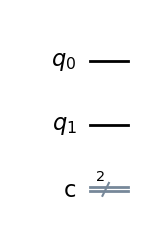

In [3]:
# Create a quantum circuit with 2 qubits and 2 classical bits
qc = QuantumCircuit(2, 2)
qc.draw('mpl')


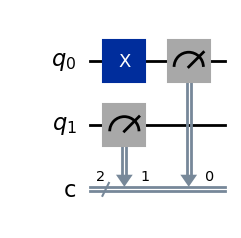

In [4]:
# Apply X gate on qubit 0 → creates |10⟩ state
qc.x(0)

# Measure both qubits
qc.measure([0, 1], [0, 1])

qc.draw('mpl')


In [5]:
# Use AerSimulator to execute the circuit
simulator = AerSimulator()
compiled_circuit = transpile(qc, simulator)
job = simulator.run(compiled_circuit, shots=1024)
result = job.result()

# Get measurement counts
counts = result.get_counts()
print("Measurement Results:", counts)
plot_histogram(counts)
plt.show()


Measurement Results: {'01': 1024}


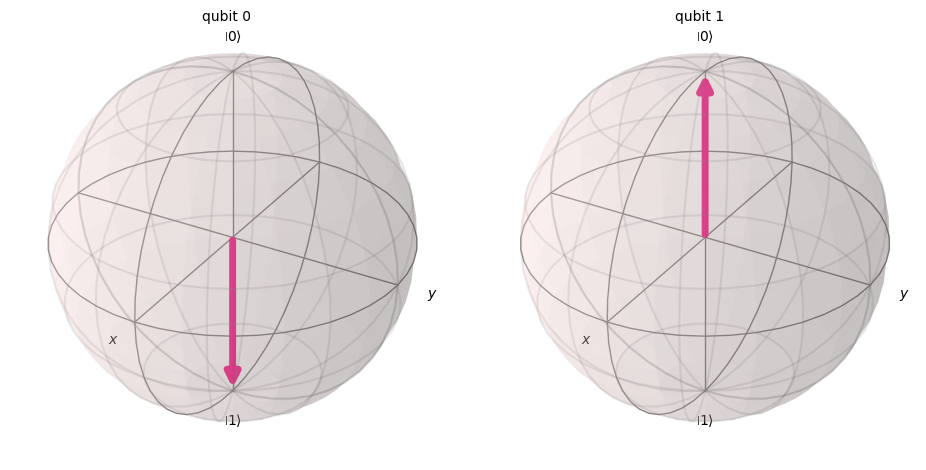

In [16]:
from qiskit.quantum_info import Statevector

# Create the circuit
qc_bloch = QuantumCircuit(2)
qc_bloch.x(0)  # Apply X gate to first qubit

# Get statevector directly
state = Statevector.from_instruction(qc_bloch)

# Plot Bloch multivector
plot = plot_bloch_multivector(state)
display(plot)


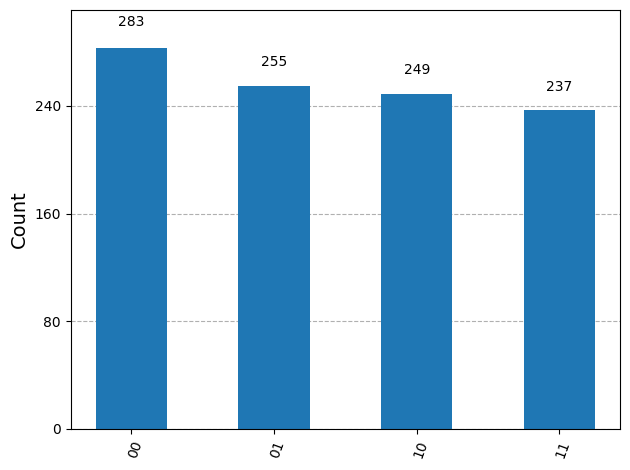

In [17]:
qc = QuantumCircuit(2, 2)
qc.h(0)
qc.h(1)
qc.measure([0, 1], [0, 1])

sim = AerSimulator()
job = sim.run(transpile(qc, sim), shots=1024)
plot = plot_histogram(job.result().get_counts())
display(plot)


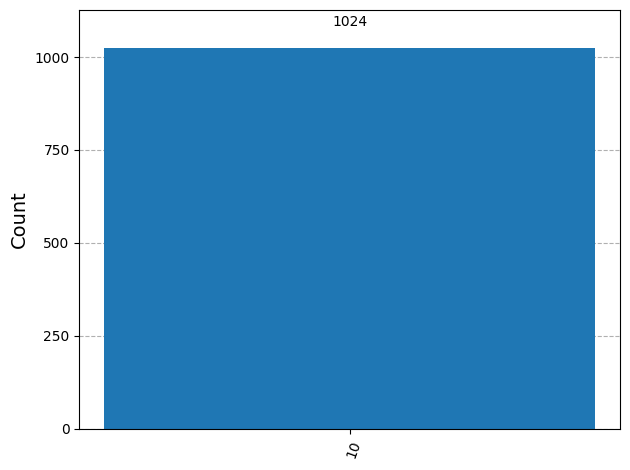

In [18]:
qc = QuantumCircuit(2, 2)
qc.x(1)
qc.measure([0, 1], [0, 1])

sim = AerSimulator()
job = sim.run(transpile(qc, sim), shots=1024)
plot = plot_histogram(job.result().get_counts())
display(plot)


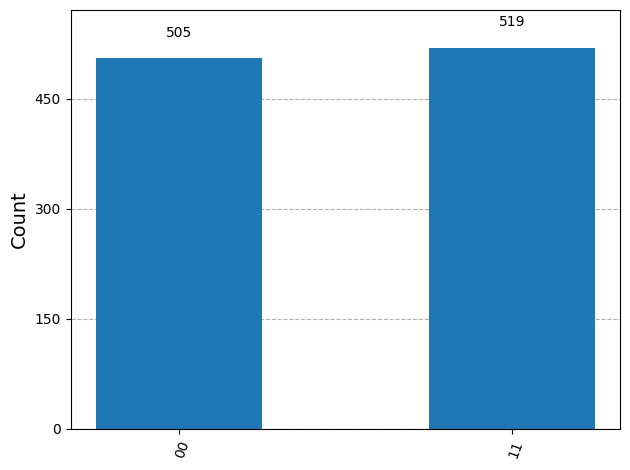

In [19]:
qc = QuantumCircuit(2, 2)
qc.h(0)
qc.cx(0, 1)
qc.measure([0, 1], [0, 1])

sim = AerSimulator()
job = sim.run(transpile(qc, sim), shots=1024)
plot = plot_histogram(job.result().get_counts())
display(plot)


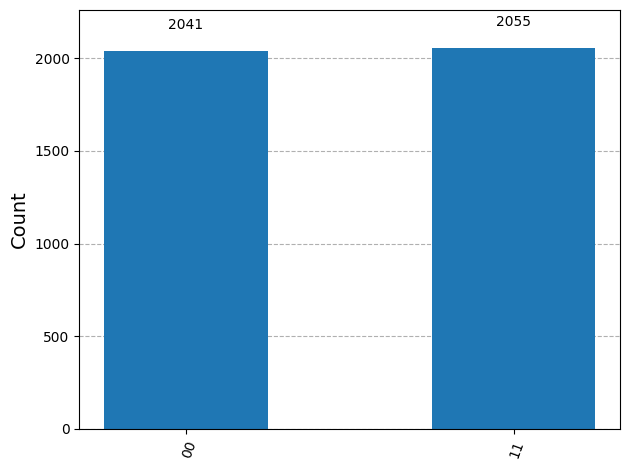

In [20]:
qc = QuantumCircuit(2, 2)
qc.h(0)
qc.cx(0, 1)
qc.measure([0, 1], [0, 1])

sim = AerSimulator()
job = sim.run(transpile(qc, sim), shots=4096)
plot = plot_histogram(job.result().get_counts())
display(plot)


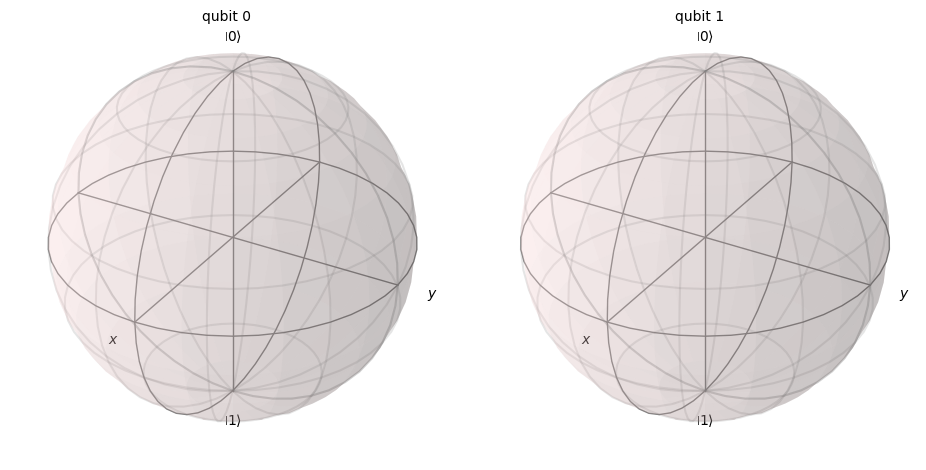

In [21]:
from qiskit.quantum_info import Statevector

qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)

state = Statevector.from_instruction(qc)
plot = plot_bloch_multivector(state)
display(plot)
